# LC3 DATA ANALYSIS

In this notebook we analize the relation of the compressive strength of LC3 with the clay used for its elaboration properties. For this purpose we utilize the dataset given by the Constructions Materials Laboratory at EPFL. This dataset consists of different measures of compressive strength for different types of LC3 cement in which the clay used for their ellaboration varies. We have also several clay properties measured and the objetive is finding the relation of the compressive strength (CS) with these for a deeper understanding of key elements in LC3 cement.

### Load libraries and data

In [1]:
from lc3_implementations import *

In [2]:
# Input file path (can be also an excel)
DATA_MERGED_PATH = './data/data_merged.ods'
DATA_FULL_PATH   = './data/data_full.ods'

In [3]:
# Read full data and remove empty lines
data_full = pd.read_excel(DATA_FULL_PATH,sheet_name='Clays_CS')
data_full.dropna(how="all", inplace=True)

In [4]:
# Read clay properties
data_clay   = pd.read_excel(DATA_FULL_PATH,sheet_name='Clays_properties')

In [5]:
# Merge to have the whole dataset
data_full_clay = pd.merge(data_full, data_clay, left_on='Clay', right_on='Clay', how='left')

In [6]:
# We rename some columns for having an easier reference
data_full_clay.rename(columns = {'Calcined kaolinite content (%)':'Kaolinite_content'}, inplace = True)
data_full_clay.rename(columns = {'Dv,50 (µm)':'Dv50'                                 }, inplace = True)
data_full_clay.rename(columns = {'BET Specific surface (m2/g)':'BET_specific_surface'}, inplace = True)

data_full_clay.rename(columns = {'STD'  : 'STD_1D'}, inplace = True)
data_full_clay.rename(columns = {'STD.1': 'STD_3D'}, inplace = True)
data_full_clay.rename(columns = {'STD.2': 'STD_7D'}, inplace = True)
data_full_clay.rename(columns = {'STD.3':'STD_28D'}, inplace = True)
data_full_clay.rename(columns = {'STD.4':'STD_90D'}, inplace = True)

# Sorting allows us to plot functions more easily
data_full_clay = data_full_clay.sort_values('Kaolinite_content')

# Get useful dataframe information
#data               # Get data
#data.describe()    # Get data general information
#data.columns       # Get data features names
#data.corr()        # Get correlation matrix

### Visualize data

In [7]:
# Take kaolinite content
x = data_full_clay['Kaolinite_content'].values

# Take compression strengths
y1  = data_full_clay[ "day_1"].values
y3  = data_full_clay[ "day_3"].values
y7  = data_full_clay[ "day_7"].values
y28 = data_full_clay["day_28"].values
y90 = data_full_clay["day_90"].values

# Measures have missing values
x1 =   x[np.logical_not(np.isnan(y1))]
y1 = y1[np.logical_not(np.isnan(y1))]
x3 =   x[np.logical_not(np.isnan(y3))]
y3 = y3[np.logical_not(np.isnan(y3))]
x7 =   x[np.logical_not(np.isnan(y7))]
y7 = y7[np.logical_not(np.isnan(y7))]
x28 =   x[np.logical_not(np.isnan(y28))]
y28 = y28[np.logical_not(np.isnan(y28))]
x90 =   x[np.logical_not(np.isnan(y90))]
y90 = y90[np.logical_not(np.isnan(y90))]

# Take standard deviations
#z1  = data[ "STD_1D"].values
#z3  = data[ "STD_3D"].values
#z7  = data[ "STD_7D"].values
#z28 = data["STD_28D"].values
#z90 = data["STD_90D"].values

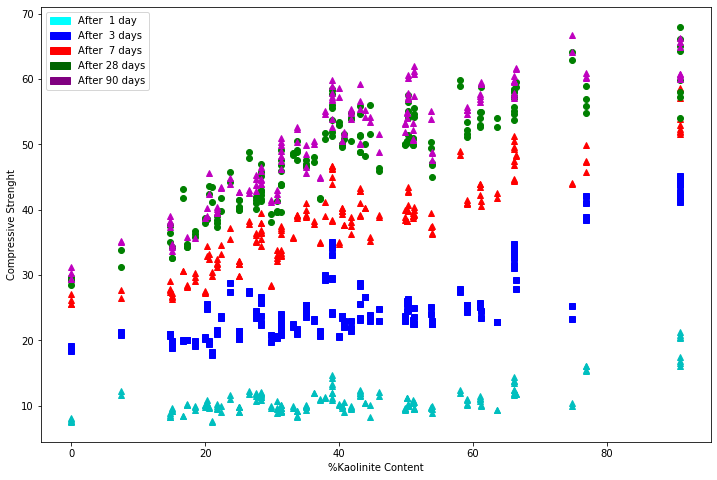

In [8]:
# Show points using matplotlib.pyplot library
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(x1,y1,'c^',x3,y3,'bs',x7,y7,'r^',x28,y28,'go', x90,y90,'m^' )
plt.xlabel('%Kaolinite Content')
plt.ylabel('Compressive Strenght')

d1_patch  = mpatches.Patch(color='cyan',      label='After  1 day')
d3_patch  = mpatches.Patch(color='blue',      label='After  3 days')
d7_patch  = mpatches.Patch(color='red',       label='After  7 days')
d28_patch = mpatches.Patch(color='darkgreen', label='After 28 days')
d90_patch = mpatches.Patch(color='purple',    label='After 90 days')
plt.legend(handles=[d1_patch,d3_patch,d7_patch,d28_patch,d90_patch])

plt.show()

# COMPRESSION STRENGTH (CS)

### Linear regression models

We have seen that the kaolinite content is the most predictive feature that we have. We are going to start creating simple linear regression models and then, following the appreciations obtained by visualizing the data, we are going to create non-linear models based on the kaolinite content for better fitting the data distribution as well as models with more features for avoiding data sparsification.

Two metrics are going to be extremely important here:
* **R square:** Is giving us a measurement of how good is our model (the closer to 1.0 the better). 
* **Validation score:** Is going to let us control overfitting. Improving R² means nothing if validation is worse. We'll use mean squared error with Leave One Out cross validation to estimate it.

In [9]:
# TODO: Remove outlier in y1 data?
# TODO: Idea for the report, removing pesimist outliers is not a good idea in our project!
# TODO: Add OPC compression strength values for reference

#### Linear models based on the kaolinite content

In [ ]:
leave_one_out_validation(x1.reshape(-1,1), y1)

In [ ]:
leave_one_out_validation(x3.reshape(-1,1), y3)

f(x) = 25.72491386854514 + 0.3039226286708796*x


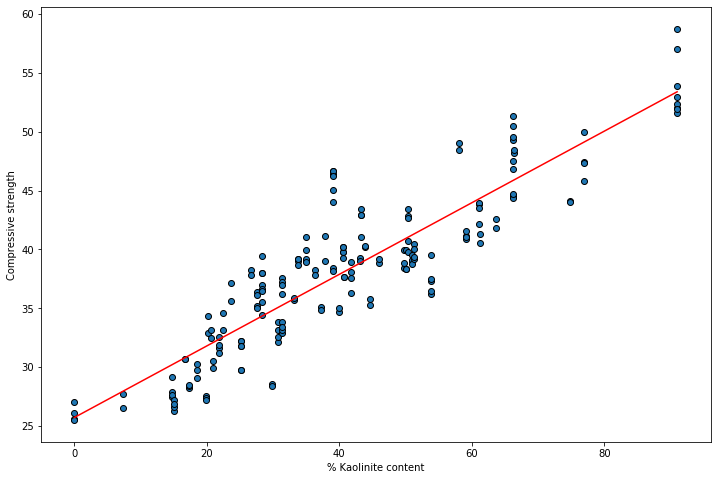

MSE: 9.226956122062079
R^2: 0.8021815770299499


In [10]:
leave_one_out_validation(x7.reshape(-1,1), y7)

In [ ]:
leave_one_out_validation(x28.reshape(-1,1), y28)

In [ ]:
leave_one_out_validation(x90.reshape(-1,1), y90)

**First sight analysis:**

* There is few more we can improve at the 7th day using only the kaolinite content, data distribution is quite a straight line.
* For 1st and 3rd day the problem is more the sparsification of the points than the lack of expresivity of the model.
* For 28th and 90th day until 40% of kaolinite content the compression strength increases linearly and then estabilizes. Makes sense a non-linear model.
* It doesn't make sense in any model a degree 3 regression model, compression strength increases with kaolinite content.

#### Non-linear models based on the kaolinite content

In [11]:
# x_2 = Kaolinite content, (Kaolinite content)^2
x1_2   = np.array([x1, x1**2]).T
x3_2   = np.array([x3, x3**2]).T
x7_2   = np.array([x7, x7**2]).T
x28_2   = np.array([x28, x28**2]).T
x90_2 = np.array([x90,x90*x90]).T 

In [ ]:
leave_one_out_validation(x1_2, y1)

In [ ]:
leave_one_out_validation(x3_2, y3)

f(x) = 24.622228848517512 + 0.3633448897361721*x + -0.000640677226453323*x^2


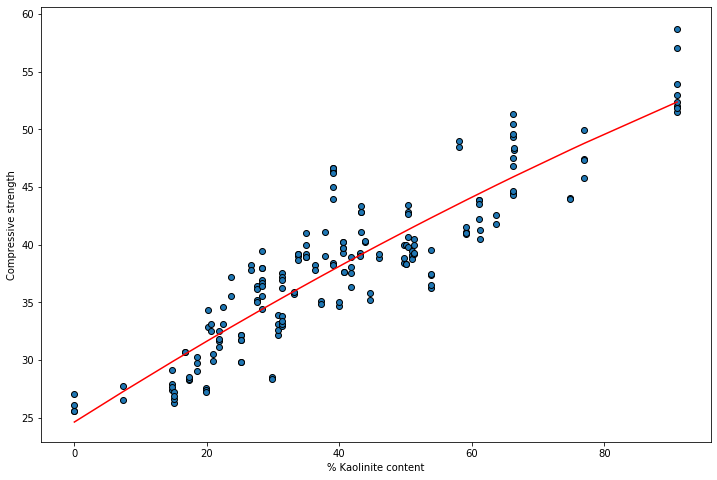

MSE: 9.199436032207917
R^2: 0.8046818970628405


In [12]:
leave_one_out_validation(x7_2, y7)

In [ ]:
leave_one_out_validation(x28_2, y28)

In [ ]:
leave_one_out_validation(x90_2, y90)

**First sight analysis:**

* Expected results, better models obtained for 28th and 90th day compression strength obtained.
* We might be experiencing overfitting with this model for 1st and 3rd day measurements because we're not increasing the compressive strength with the increase of calonita for small contents.

### Feature selection

In [13]:
#### TODO: Dummy issue, we have generalized feature selection function but in one dataset days ar "7D" and in the other days are "day_7"

In [14]:
# Which features are realiable? Those with more than RELIABLE_THRESHOLD measurements
RELIABLE_THRESHOLD = 45

features = data_full_clay.columns[14:]
reliable_features = [f for f in features if data_full_clay[f].describe()[0] >= RELIABLE_THRESHOLD]

In [15]:
# Show the reliable features, with enough points to rely
#reliable_features

In [ ]:
feature_selection(data_full_clay,reliable_features)
#feature_selection(features)

#### Linear regression models based on the kaolinite content and other features

Following the results obtained in the feature selection part, here we are creating and analyzing the models done with the kaolinite conent (in degree one and two) as well as other feature.

In [ ]:
### TODO: Same issue than in feature selection, unify days names in both datasets!

In [ ]:
# Day 1 
mod = smf.ols(formula='day_1 ~ Kaolinite_content + Kaolinite_content_square + Dv50', data=get_model_data(data_full_clay,'Dv50','1D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 1 
mod = smf.ols(formula='day_1 ~ Kaolinite_content + Kaolinite_content_square + CaO', data=get_model_data('CaO','1D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 3
mod = smf.ols(formula='day_3 ~ Kaolinite_content + Kaolinite_content_square + Dv50', data=get_model_data('Dv50','3D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 3
mod = smf.ols(formula='day_3 ~ Kaolinite_content + Kaolinite_content_square + CaO', data=get_model_data('CaO','3D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 7
mod = smf.ols(formula='day_7 ~ Kaolinite_content + Kaolinite_content_square + BET_specific_surface', data=get_model_data('BET_specific_surface','7D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 28
mod = smf.ols(formula='day_2 ~ Kaolinite_content + Kaolinite_content_square + BET_specific_surface', data=get_model_data('BET_specific_surface','28D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 28
mod = smf.ols(formula='day_2 ~ Kaolinite_content + Kaolinite_content_square + TiO2', data=get_model_data('TiO2','28D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 90
mod = smf.ols(formula='day_9 ~ Kaolinite_content + Kaolinite_content_square + BET_specific_surface', data=get_model_data('BET_specific_surface','90D'))
np.random.seed(2)
res = mod.fit()
res.summary()

In [ ]:
# Day 90
mod = smf.ols(formula='day_9 ~ Kaolinite_content + Kaolinite_content_square + TiO2', data=get_model_data('TiO2','90D'))
np.random.seed(2)
res = mod.fit()
res.summary()

### Confidence analysis for the models

We know our model (function depending on the features provided) as well as some metrics to have an idea of how well our model fits our data (R2) and how is it behaving in practice with new data (MSE). The objetive of this section is to provide a more mathematical analysis of the confidence we can expect from our models.

#### Toy example for putting things into practice

We are going to start with the Kaolinite content based model for compression strength at day 90 to exemplify the tools and techniques we can use to estimate confidence intervals in our model.

In [13]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [14]:
data_90=data_full_clay[['day_90','Kaolinite_content']].dropna().copy()
data_90.insert(2, 'Kaolinite_content_square', data_90['Kaolinite_content']**2, True)

In [15]:
# Day 90
mod = smf.ols(formula='day_90 ~ Kaolinite_content_square + Kaolinite_content', data=data_90)
np.random.seed(2)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 day_90   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     422.3
Date:                Fri, 11 Dec 2020   Prob (F-statistic):           4.05e-62
Time:                        13:21:00   Log-Likelihood:                -398.14
No. Observations:                 152   AIC:                             802.3
Df Residuals:                     149   BIC:                             811.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   27.4977      1.053     26.101      0.000      25.416      29.579
Kaolinite_content_square    -0.0042      0.000     -8.546      0.000      -0.005      -0.003
Kaolinite_content            0.7661      0.047     16.131      0.000       0.672       0.860
==============================================================================
Omnibus:                        0.918   Durbin-Watson:                   0.647
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.889
Skew:                           0.183   Prob(JB):                        0.641
Kurtosis:                       2.922   Cond. No.                     1.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

f(x) = 27.49766314037673 + 0.7660694480966864*x + -0.004203918162902441*x^2


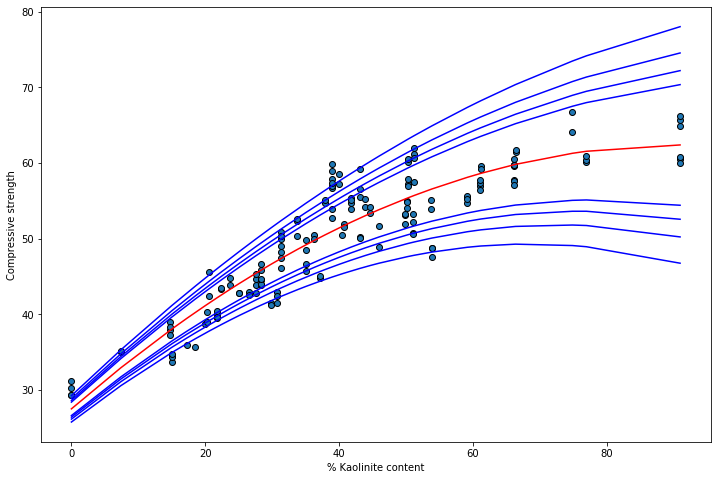

MSE: 11.407070054088848
R^2: 0.8500509643195538



In [16]:
plot_confidence_intervals(data_90, 90)

In [19]:
prstd, iv_l, iv_u = wls_prediction_std(res)

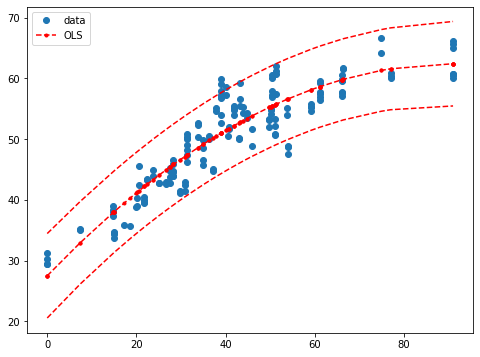

In [20]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x90, y90, 'o', label="data")
#ax.plot(x90, model.predict(x90.reshape(-1,1)), 'b-', label="True")
ax.plot(x90, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x90, iv_u, 'r--')
ax.plot(x90, iv_l, 'r--')
ax.legend(loc='best')

In [ ]:
data_28=data_full_clay[['day_28','Kaolinite_content']].dropna().copy()
data_28.insert(2, 'Kaolinite_content_square', data_28['Kaolinite_content']**2, True)

In [ ]:
plot_confidence_intervals(data_28, 28)

In [ ]:
prstd, iv_l, iv_u = wls_prediction_std(res)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x28, y28, 'o', label="data")
#ax.plot(x90, model.predict(x90.reshape(-1,1)), 'b-', label="True")
ax.plot(x28, res.fittedvalues, 'r--.', label="OLS")
ax.plot(x28, iv_u, 'r--')
ax.plot(x28, iv_l, 'r--')
ax.legend(loc='best')

**First sight analysis:**

* We can't afford confidence intervals of such a high precission with such a lack of points, specially for high kaolinite contents.
* However, this worths a try after adding all the points from the second excel!

### Not so toy example, how I would like it to be:

In [21]:
data_7=data_full_clay[['day_7','Kaolinite_content']].dropna().copy()
data_7.insert(2, 'Kaolinite_content_square', data_7['Kaolinite_content']**2, True)

f(x) = 24.622228848517274 + 0.3633448897361764*x + -0.0006406772264532692*x^2


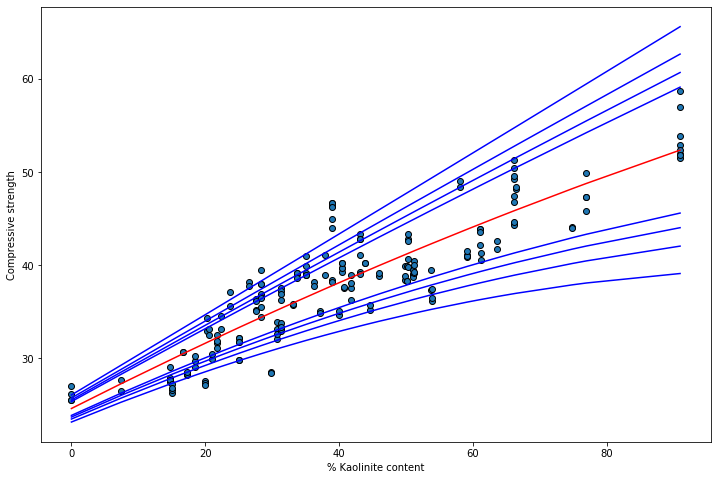

MSE: 9.199436032207917
R^2: 0.8046818970628405



In [22]:
plot_confidence_intervals(data_7, 7)

f(x) = 24.622228848517274 + 0.3633448897361764*x + -0.0006406772264532692*x^2


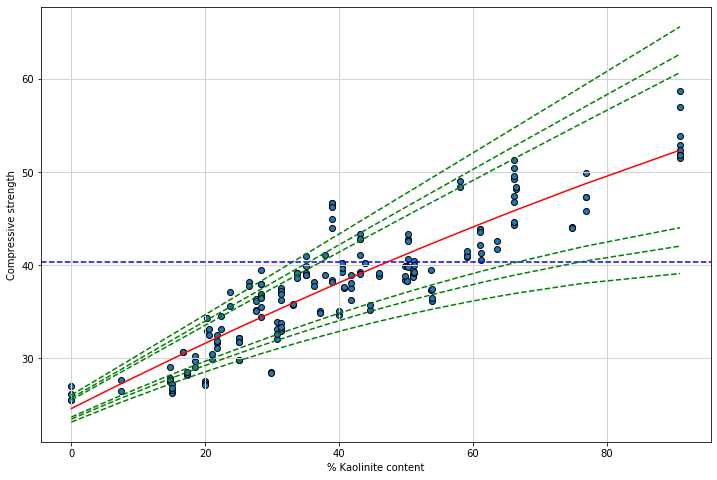

MSE: 9.199436032207917
R^2: 0.8046818970628405



In [23]:
# TODO: Customize!!
# Colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
# Grid:   https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html

day = 7
CS_day_7 = 40.38

X = data_7[['Kaolinite_content','Kaolinite_content_square']].values
y = data_7['day_'+str(day)]

res = smf.ols(formula='day_'+str(day)+' ~ Kaolinite_content + Kaolinite_content_square', data=data_7).fit()

conf90 = res.conf_int(alpha=0.1)
conf80 = res.conf_int(alpha=0.2)
conf70 = res.conf_int(alpha=0.3)

# This could be generalized but degree n >= 3 leads to overfitting!
print('f(x) = {0} + {1}*x + {2}*x^2'.format(res.params[0],res.params[1],res.params[2]))
    
# Get the list of predictions obtained while validating
model = LinearRegression()
model.fit(X,y)

predicted = cross_val_predict(model, X, y, cv=LeaveOneOut())

# Plot the results
fig, ax = plt.subplots(figsize=(12, 8))

plt.axhline(y = CS_day_7, color = 'b', linestyle = '--') # OPC reference
plt.grid(color='lightgrey', linestyle='-', linewidth=1)  # Grid

ax.scatter(X[:,0], y, edgecolors=(0, 0, 0))

ax.plot(X[:,0], np.dot(X,[conf70[0][1],conf70[0][2]]) + conf70[0][0],'g--')
ax.plot(X[:,0], np.dot(X,[conf80[0][1],conf80[0][2]]) + conf80[0][0],'g--')
ax.plot(X[:,0], np.dot(X,[conf90[0][1],conf90[0][2]]) + conf90[0][0],'g--')
ax.plot(X[:,0], np.dot(X,model.coef_) + model.intercept_,'r-')
ax.plot(X[:,0], np.dot(X,[conf90[1][1],conf90[1][2]]) + conf90[1][0],'g--')
ax.plot(X[:,0], np.dot(X,[conf80[1][1],conf80[1][2]]) + conf80[1][0],'g--')
ax.plot(X[:,0], np.dot(X,[conf70[1][1],conf70[1][2]]) + conf70[1][0],'g--')

ax.set_xlabel('% Kaolinite content')
ax.set_ylabel('Compressive strength')
plt.show()

# Metrics for the model
print("MSE: {}".format(mean_squared_error(y, predicted)))
print("R^2: {}".format(model.score(X,y)))
print()

### References:

* How to deal with small datasets:\
https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

* Feature engineering: \
https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

* Feature selection: \
https://en.wikipedia.org/wiki/Feature_selection \
https://machinelearningmastery.com/an-introduction-to-feature-selection/ \
https://machinelearningmastery.com/feature-selection-machine-learning-python/ \
https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/ \
https://machinelearningmastery.com/calculate-feature-importance-with-python/

* Linear regression with python: \
https://realpython.com/linear-regression-in-python/ 

* Confidence estimation: \
https://www.puneetarora2000.com/2020/01/data-interpretation-understanding-ols.html \
https://medium.com/@jyotiyadav99111/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01 \
https://www.statsmodels.org/stable/regression.html \

